In [104]:
"""
This is a machine learning program for Churn prediction and analysis.
The program uses an excel file as input and uses the data to predict the churn rate of the company.

Author: Sharaj Jagadeesan
Date: 26-03-2025
"""

'\nThis is a machine learning program for Churn prediction and analysis.\nThe program uses an excel file as input and uses the data to predict the churn rate of the company.\n\nAuthor: Sharaj Jagadeesan\nDate: 26-03-2025\n'

In [105]:
""" Importing the necessary libraries """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [106]:
""" 
Loading the data onto the pipeline.
We are using the pandas library to load the data from the excel file. However, in an ideal scenario, 
we would be building a pipeline which can transform data from various sources.

"""
filename = ".\data\dataset.xlsx"
data = pd.read_excel(filename)
data.head()

,account_id,month_year_key,start_arr_fme2,end_arr_fme2,MRR Bucket,first_invoice,region,emp_size,Churn_fme2,BKG_fme2,Net_Churn_FME2,MONTH,FME2_MY,month_year_key_dt,diff_months,PRE_POST,churn_fme2_multi_comp,Flag
0,A82137,2024-01-01 00:00:00+00:00,6240.0,6240.0,>100,2016-01-12 20:43:24+00:00,APMEA,11-50,0.0,0,0.0,2024-01-01,2024-01-01-A-82000082137,2024-01-01 00:00:00+00:00,96,Post,NaN,NaN
1,A82137,2024-02-01 00:00:00+00:00,6240.0,6240.0,>100,2016-01-12 20:43:24+00:00,APMEA,11-50,0.0,0,0.0,2024-02-01,2024-02-01-A-82000082137,2024-02-01 00:00:00+00:00,97,Post,NaN,NaN
2,A82137,2024-03-01 00:00:00+00:00,6240.0,6240.0,>100,2016-01-12 20:43:24+00:00,APMEA,11-50,0.0,0,0.0,2024-03-01,2024-03-01-A-82000082137,2024-03-01 00:00:00+00:00,98,Post,NaN,NaN
3,A82137,2024-04-01 00:00:00+00:00,6240.0,6240.0,>100,2016-01-12 20:43:24+00:00,APMEA,11-50,0.0,0,0.0,2024-04-01,2024-04-01-A-82000082137,2024-04-01 00:00:00+00:00,99,Post,NaN,NaN
4,A82137,2024-05-01 00:00:00+00:00,6240.0,6240.0,>100,2016-01-12 20:43:24+00:00,APMEA,11-50,0.0,0,0.0,2024-05-01,2024-05-01-A-82000082137,2024-05-01 00:00:00+00:00,100,Post,NaN,NaN


In [107]:
print("Shape of the dataset:")
display(data.shape)

print("Columns in the dataset:")
display(data.head())

print("Information about the dataset:")
display(data.info())

print("Description of the dataset:")
display(data.describe())

print("Checking for missing values:")
display(data.isnull().sum())


Shape of the dataset:


(2573, 18)

Columns in the dataset:


,account_id,month_year_key,start_arr_fme2,end_arr_fme2,MRR Bucket,first_invoice,region,emp_size,Churn_fme2,BKG_fme2,Net_Churn_FME2,MONTH,FME2_MY,month_year_key_dt,diff_months,PRE_POST,churn_fme2_multi_comp,Flag
0,A82137,2024-01-01 00:00:00+00:00,6240.0,6240.0,>100,2016-01-12 20:43:24+00:00,APMEA,11-50,0.0,0,0.0,2024-01-01,2024-01-01-A-82000082137,2024-01-01 00:00:00+00:00,96,Post,NaN,NaN
1,A82137,2024-02-01 00:00:00+00:00,6240.0,6240.0,>100,2016-01-12 20:43:24+00:00,APMEA,11-50,0.0,0,0.0,2024-02-01,2024-02-01-A-82000082137,2024-02-01 00:00:00+00:00,97,Post,NaN,NaN
2,A82137,2024-03-01 00:00:00+00:00,6240.0,6240.0,>100,2016-01-12 20:43:24+00:00,APMEA,11-50,0.0,0,0.0,2024-03-01,2024-03-01-A-82000082137,2024-03-01 00:00:00+00:00,98,Post,NaN,NaN
3,A82137,2024-04-01 00:00:00+00:00,6240.0,6240.0,>100,2016-01-12 20:43:24+00:00,APMEA,11-50,0.0,0,0.0,2024-04-01,2024-04-01-A-82000082137,2024-04-01 00:00:00+00:00,99,Post,NaN,NaN
4,A82137,2024-05-01 00:00:00+00:00,6240.0,6240.0,>100,2016-01-12 20:43:24+00:00,APMEA,11-50,0.0,0,0.0,2024-05-01,2024-05-01-A-82000082137,2024-05-01 00:00:00+00:00,100,Post,NaN,NaN


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   account_id             2573 non-null   object        
 1   month_year_key         2573 non-null   object        
 2   start_arr_fme2         2573 non-null   float64       
 3   end_arr_fme2           2573 non-null   float64       
 4   MRR Bucket             2573 non-null   object        
 5   first_invoice          2573 non-null   object        
 6   region                 2573 non-null   object        
 7   emp_size               2573 non-null   object        
 8   Churn_fme2             2573 non-null   float64       
 9   BKG_fme2               2573 non-null   int64         
 10  Net_Churn_FME2         2573 non-null   float64       
 11  MONTH                  2573 non-null   datetime64[ns]
 12  FME2_MY                2573 non

None

Description of the dataset:


,start_arr_fme2,end_arr_fme2,Churn_fme2,BKG_fme2,Net_Churn_FME2,MONTH,diff_months,churn_fme2_multi_comp
count,2573.000000,2573.000000,2573.000000,2573.0,2573.000000,2573,2573.000000,65.000000
mean,2381.321182,2385.631294,34.259091,0.0,34.259091,2024-07-13 05:05:00.816167936,99.394870,-1356.132923
min,0.000000,0.000000,0.000000,0.0,0.000000,2024-01-01 00:00:00,1.000000,-7104.000000
25%,684.000000,648.000000,0.000000,0.0,0.000000,2024-04-01 00:00:00,99.000000,-1740.000000
50%,1704.000000,1644.000000,0.000000,0.0,0.000000,2024-07-01 00:00:00,103.000000,-696.000000
75%,3300.000000,3300.000000,0.000000,0.0,0.000000,2024-11-01 00:00:00,107.000000,-420.000000
max,15647.040000,15647.040000,7104.000000,0.0,7104.000000,2025-02-01 00:00:00,144.000000,-0.120000
std,2243.070352,2289.800103,323.088749,0.0,323.088749,NaN,17.739089,1540.902155


Checking for missing values:


account_id                  0
month_year_key              0
start_arr_fme2              0
end_arr_fme2                0
MRR Bucket                  0
first_invoice               0
region                      0
emp_size                    0
Churn_fme2                  0
BKG_fme2                    0
Net_Churn_FME2              0
MONTH                       0
FME2_MY                     0
month_year_key_dt           0
diff_months                 0
PRE_POST                    0
churn_fme2_multi_comp    2508
Flag                     2508
dtype: int64

### EDA Results:

There are 2573 rows and 18 columns of data. Out of these 18 columns, there are 7 columns with numerical values and 11 with categorical values.
Using one-hot encoding, all the columns can be changed into numerical columns. 

Next step would be to select the required features and discard the features which are not required for building the model. The class imbalance will be addressed using techniques like SMOTE.

Correlation between the columns can be studied to further aid with the feature selection.


In [109]:
""" 
Dropping the columns which are not required for the model training.
Transforming the categorical colummns into numerical columns using LabelEncoder.
"""

df = data.drop(['account_id','month_year_key', 'FME2_MY', 'month_year_key_dt', 'BKG_fme2', 'first_invoice' ,'churn_fme2_multi_comp'], axis=1)
df['Flag'] = df['Flag'].apply(lambda x: 1 if x == 'Churn_ackey' else 0)

le = LabelEncoder()

df['MRR Bucket'] = le.fit_transform(df['MRR Bucket'])
df['region'] = le.fit_transform(df['region'])
df['emp_size'] = le.fit_transform(df['emp_size'])
df['PRE_POST'] = le.fit_transform(df['PRE_POST'])


In [110]:
""" 
Training the model using Random Forest Classifier.
We are using the Random Forest Classifier as it is a powerful model which can be used for classification problems.
We are also using SMOTE to handle the class imbalance in the dataset.
Splitting the data into training and testing sets using train_test_split at the ratio of 80:20.

"""
# Train test split
X = df.drop(['Flag', 'Churn_fme2', 'MONTH'], axis=1)
y = df['Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

smote = SMOTE(random_state=10)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=10)

model.fit(X_train_smote, y_train_smote)
y_test_pred = model.predict(X_test)
print("Final Test Set Classification Report:\n", classification_report(y_test, y_test_pred))


Final Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       503
           1       1.00      1.00      1.00        12

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515



### Why Random Forest Classifier?

Random Forest Classifier is an ensemble method which can be used for prediction tasks. It is very robust to overfitting and can capture non liner interactions much better than other models like Decision tree classifier. Random Forest Classifiers also work well on imbalanced datasets which is the case here.

### SMOTE

SMOTE is used to handle class imbalance. Here, it generates synthetic data for the minority class using k-nearest neighbours.

         features  importance
5  Net_Churn_FME2    0.785267
1    end_arr_fme2    0.123811
0  start_arr_fme2    0.033215
3          region    0.023396
6     diff_months    0.015381
4        emp_size    0.013714
2      MRR Bucket    0.005040
7        PRE_POST    0.000176


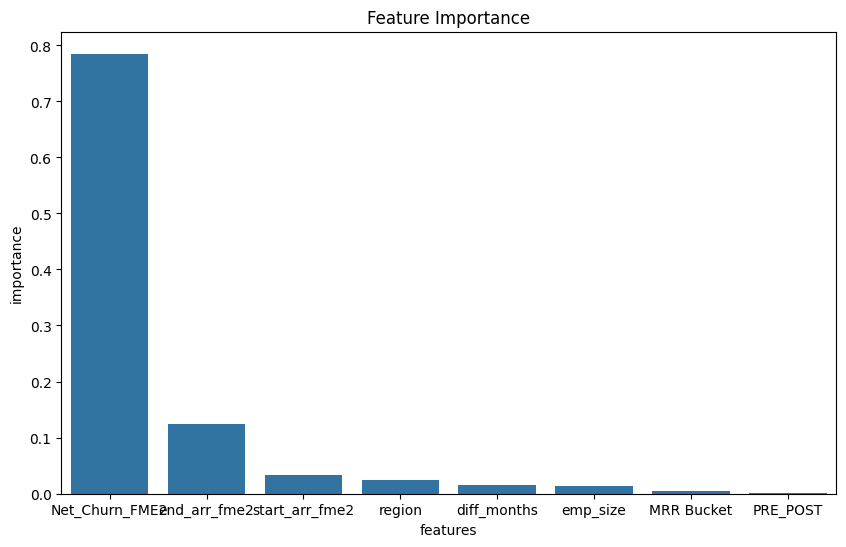

In [111]:
""" 
Feature Importance Analysis.
We are using the feature_importances_ attribute of the Random Forest Classifier to get the importance of each feature.
We are then plotting the feature importance using a barplot.

"""

feature_importances = model.feature_importances_
features = X.columns
df_features = pd.DataFrame({'features': features, 'importance': feature_importances})
df_features = df_features.sort_values('importance', ascending=False)
print(df_features)
plt.figure(figsize=(10, 6))
sns.barplot(y='importance', x='features', data=df_features)
plt.title('Feature Importance')
plt.show()


Final Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       503
           1       1.00      1.00      1.00        12

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515

         features  importance
5  Net_Churn_FME2    3.408689
0  start_arr_fme2    1.695951
6     diff_months    0.012010
4        emp_size   -0.045889
7        PRE_POST   -0.229222
2      MRR Bucket   -0.289847
1    end_arr_fme2   -1.695547
3          region   -1.985721


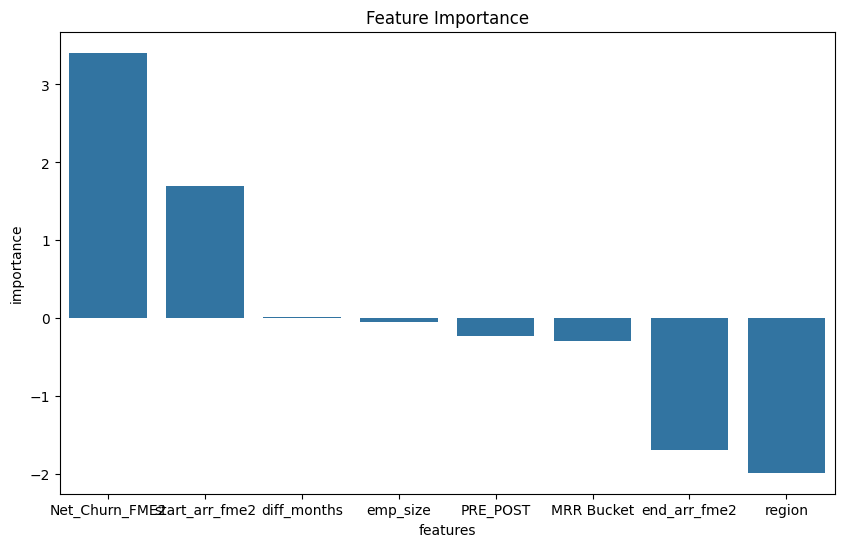

In [113]:
"""  
Using Logistic Regression for the model training.
This is an alternative model which can be used for classification problems.
We are using the Logistic Regression model to train the data for churn prediction.
Again, we are using SMOTE to handle the class imbalance in the dataset.
Feature Importance Analysis is also done for the Logistic Regression model using the coef_ attribute.

"""

model_log = LogisticRegression(random_state=10)
model_log.fit(X_train_smote, y_train_smote)
y_test_pred = model.predict(X_test)
print("Final Test Set Classification Report:\n", classification_report(y_test, y_test_pred))

# finding the most important features
feature_importances = model_log.coef_[0]
features = X.columns
df_features = pd.DataFrame({'features': features, 'importance': feature_importances})
df_features = df_features.sort_values('importance', ascending=False)
print(df_features)
plt.figure(figsize=(10, 6))
sns.barplot(y='importance', x='features', data=df_features)
plt.title('Feature Importance')
plt.show()



## Insights:

#### Feature Importance:

Net_Churn_FME2 (0.785) is by far the strongest predictor of churn, showing that a customer's past churn behavior is highly linked to future churn. If someone has churned before, they're much more likely to churn again.

End_arr_fme2 (0.1238) indicates that when a user stops engaging is a key indicator of whether they’ll churn. The closer they get to an "end" period, the higher the risk.

Start_arr_fme2 (0.0332) plays a role in churn prediction, though it’s not as impactful as when a user leaves. While the start of engagement matters, it doesn't weigh as heavily as the point at which they disengage.

Region (0.0234) has some influence on churn, suggesting that customers in different geographical locations may have varying churn rates due to market conditions, competition, or behavioral differences.

Diff_months (0.0154), which measures the time gap between key customer events, has a minor impact but might still help identify trends related to customer behavior over time.

Emp_size (0.0137) suggests that company size plays a small role in churn prediction. Larger or smaller businesses might exhibit different churn patterns, but the effect is relatively minor.

MRR Bucket (0.0050) shows that the revenue tier a customer falls into has very little effect on churn. High and low spenders seem to exhibit similar churn behaviors, meaning revenue level alone isn’t a strong predictor.

PRE_POST (0.0002) has almost no influence on churn, meaning it can likely be excluded from future models without losing predictive power.


#### Inference:

Customers who have churned before are much more likely to do so again, showing that past churn behavior is a strong predictor of future churn.

The timing of customer engagement also plays a key role. When a customer stops engaging is a bigger warning sign for churn than when they first start.

Demographic and business-related factors, like a customer’s region or company size, have some influence on churn risk. However, they don’t carry as much weight as behavioral patterns.